In [15]:
from data_processing import *
from model_training import *
import glob
import math
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import warnings
from os import path
warnings.filterwarnings("ignore")

In [16]:
columns = pd.read_csv('data/columns.txt', header=None)
columns_list = columns.transpose().values.tolist()[0]

sensors = ['lJPos', 'rJPos', 'lJVel',
           'rJVel', 'gyroX', 'gyroY', 'gyroZ', 'accX',
           'accY', 'accZ']

mode_pool = ['L0R0']
trial_pool = [1, 2, 3, 4, 5]
data_all = []

data_dir = 'data/'
for mode in mode_pool:
    for trial in trial_pool:
        file_path = data_dir+'log_'+str(mode)+'_'+str(trial)+'.txt'
        if path.exists(file_path) == 1:
            for read_path in glob.glob(file_path):
                data = pd.read_csv(read_path, sep=" ", header=None)
                data = data.iloc[:,0:15]
                data.columns = columns_list
                data = data[sensors]
                data_all.append(data)
data_list = label_data(data_all)

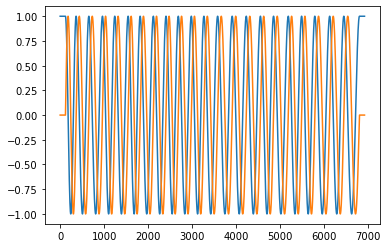

In [9]:
data_list[0].head()
plt.plot(data_list[0]['rightGaitPhaseX'])
plt.plot(data_list[0]['rightGaitPhaseY'])
plt.show()

In [25]:
# MLP Model
hyperparam_space = {
    'window_size': [30],
    'model': 'mlp',
    'dense': {
        'num_layers': [1],
        'num_nodes': [5],
        'activation': ['tanh']
    },
    'optimizer': {
        'loss': ['mean_absolute_error'],
        'optimizer': ['adam']
    },
    'training': {
        'epochs': [2],
        'batch_size': [128]
    }
}
hyperparameter_configs = get_model_configs(hyperparam_space)

In [26]:
trial_results, average_results = train_models(hyperparam_space['model'], hyperparameter_configs, data_list)

(20943, 50)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 50)                101       
_________________________________________________________________
dense (Dense)                (None, 5)                 255       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 24        
Total params: 380
Trainable params: 279
Non-trainable params: 101
_________________________________________________________________
Epoch 1/2
131/131 [==============================] - 0s 2ms/step - loss: 0.6805 - val_loss: 0.6434
Epoch 2/2
131/131 [==============================] - 0s 844us/step - loss: 0.5958 - val_loss: 0.6357
(23134, 50)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalizat

IndexError: list index out of range

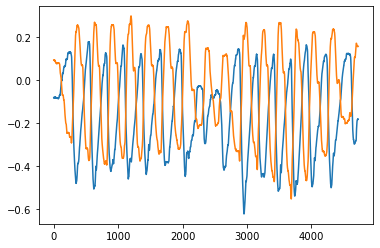

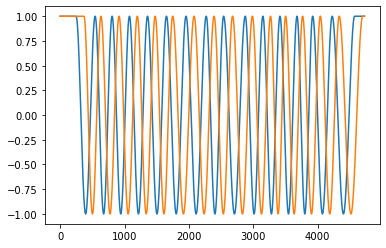

NameError: name 'average_results' is not defined

In [27]:
idx = 1
plt.plot(data_list[idx]['lJPos'])
plt.plot(data_list[idx]['rJPos'])
plt.show()

plt.plot(data_list[idx]['leftGaitPhaseX'])
plt.plot(data_list[idx]['rightGaitPhaseX'])
plt.show()
display(average_results)